In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel(r'C:\Users\kumnitin1\Pictures\Python\SIG\SIG_High_Risk_Customer.xlsx')
pd.set_option('display.max_columns', None)
df.head()

,Account Code,Risk Category,Balance,Main Account Code,Statement Account no,Invoice Account No,Account Level Type,Customer Name,Amount Overdue,Company Reg No,Branch,Address 1,Address 2,Address 3,Address 4,Address 5,Post Code,Credit Limit,Company Credit Stop,Legal Indicator,Can Order,Status,Open Date,Last Paid,Turnover YTD,Turnover PY,Turnover PY-1,Account Credit Controller Name,Closed Date,Terms Code,Customer Category,Business Type,CurrentDebt,M-1,M-2,M-3,M-4,M-5,M4+,On Account Payments,area_code,area_desc,region_code,region_desc,division_desc,Indemnity Credit Limit,Guarantee Expiry Date,Settlement Disc Code,Net Worth,Limit,Days Beyond Terms,Latest Account,Profit Before Tax,Indemnity Review Date,Risk Notes,Payment Term Code
0,1499,M,2852.04,733913,1499,1499,I,Vinci Construction (uk) Ltd,0,2295904,7033-Cardiff,Astral House,Imperial Way,Watford,Hertfordshire,,WD24 4WW,120000,N,,Y,N,1977-02-01,2014-01-31,-24725.82,51492.52,26598.06,Stefan Kapitanov,NaT,30K,N,449-National Builder,0,2852.04,0.00,0.00,0.0,0.00,0.00,0.00,1003,SIGD West,101,SIG Distribution (Regional),SIG Distribution,350000,NaT,0,2.0,500.0,0.0,NaN,0.0,NaT,<Craig Salkeld : 20/06/2015 : 09:23:47>Credit ...,30
1,1453,M,135415.88,25217,1453,1453,I,Ogilvie Construction Ltd,0,SC069644,7002-Eurocentral,Pirnhall Works,Glasgow Road,Whins of Milton,Stirling,,FK7 8ES,650000,N,,Y,N,1977-10-01,2014-01-31,483970.83,697808.37,1217865.26,Ivaylo Baykov,NaT,30,N,302-Regional Builder,0,56387.02,73698.50,2378.51,0.0,1864.37,1864.37,1087.48,1001,SIGD Scotland & North East,101,SIG Distribution (Regional),SIG Distribution,68000,NaT,0,17501000.0,837500.0,21.0,NaN,598000.0,NaT,<Milana K Shivappa : 14/04/2023 : 12:35:44>Acc...,30
2,4,L,775127.19,2074839,4,4,S,Travis Perkins Trading Company Limited,0,733503,8007-SIGD Central Admin,Po Box 7015,Northampton,,,,NN5 7WQ,2975000,N,,N,N,1977-10-01,2013-06-05,2927480.60,3917009.67,4135421.41,Stefan Kapitanov,NaT,45K,N,112-Builders Merchant,0,476537.79,271285.46,18476.82,737.6,1923.30,8827.12,0.00,1000,SIGD Central Admin,100,SIGD Central Admin,SIGD Central Admin,1200000,NaT,0,291500000.0,34650000.0,8.0,NaN,264600000.0,NaT,<Neil Lane : 11/06/2015 : 11:15:47>Bad Debt So...,45
3,2998,M,108952.81,2998,2998,2998,I,Sound Interiors Ltd,0,2761406,7187-SIGD Manchester,4 LEVENS ROAD,NEWBY ROAD INDUSTRIAL ESTATE,HAZEL GROVE,STOCKPORT,,SK7 5DL,425000,N,,Y,N,1977-10-01,2014-01-27,319173.00,841458.89,20981.75,Lachezar Borisov,NaT,60,N,405-Drylining,0,49454.37,59498.44,0.00,0.0,0.00,0.00,0.00,1002,SIGD North,101,SIG Distribution (Regional),SIG Distribution,500000,NaT,0,1543735.0,113500.0,12.0,NaN,0.0,NaT,<Kay Needham : 07/01/2016 : 08:54:50>Medium Ri...,60
4,3897,L,2449.64,2092814,3897,3897,S,British Gypsum Ltd,0,209091,7034-Loughborough,CENTRAL ACCOUNTS DEPT.,"FINANCE BUILDINGS,","EAST LEAKE ,",LOUGHBOROUGH,,LE12 6JU,20000,N,,N,N,1977-10-01,2014-01-13,18109.75,7861.23,14889.46,Stefan Kapitanov,NaT,30K,N,405-Drylining,0,1194.53,0.00,1255.11,0.0,0.00,0.00,0.00,1002,SIGD North,101,SIG Distribution (Regional),SIG Distribution,0,NaT,0,2252000.0,180000.0,21.0,NaN,0.0,NaT,[[Risk Notes]] SHEF9BR195 29.11.2010 MONITORI...,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13318 entries, 0 to 13317
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Account Code                    13318 non-null  int64         
 1   Risk Category                   13318 non-null  object        
 2   Balance                         13318 non-null  float64       
 3   Main Account Code               13318 non-null  int64         
 4   Statement Account no            13318 non-null  int64         
 5   Invoice Account No              13318 non-null  int64         
 6   Account Level Type              13318 non-null  object        
 7   Customer Name                   13318 non-null  object        
 8   Amount Overdue                  13318 non-null  int64         
 9   Company Reg No                  13312 non-null  object        
 10  Branch                          13318 non-null  object        
 11  Ad

In [4]:
n = dict(df['Risk Category'].value_counts())
n

{'M': 11953, 'H': 699, 'L': 646, ' ': 20}

In [5]:
df['Risk Category'].isnull().sum()

0

In [6]:
space_count= df['Risk Category'].apply(lambda x: x.isspace()).sum()
empty_strings_count = (df['Risk Category'].str.strip() =='').sum()
print (space_count, empty_strings_count)

20 20


In [7]:
df['Risk Category'] = df['Risk Category'].replace(r'^\s*$', '0', regex=True)

df['Risk Category'].value_counts()

#I will use One Hot Encode in this column

M    11953
H      699
L      646
0       20
Name: Risk Category, dtype: int64

In [8]:
df['Risk Category'].isnull().sum()

0

In [9]:
acc_code = df.groupby('Account Code').size().reset_index(name= 'count').sort_values(by= 'count', ascending = False)
acc_code

,Account Code,count
0,3,1
8324,155046,1
8872,169580,1
8873,169582,1
8874,169584,1
...,...,...
4442,81557,1
4443,81561,1
4444,81580,1
4445,81600,1


In [10]:
num_duplicates = df.duplicated(subset=['Account Code'], keep=False).sum()
print(num_duplicates)


0


In [11]:
acc_lev = df.groupby('Account Level Type').size().reset_index(name = 'count')
acc_lev


,Account Level Type,count
0,I,12959
1,S,359


In [12]:
uniq_Branch = df['Branch'].nunique()
uniq_Branch

217

In [13]:
df.groupby('Company Credit Stop').size().reset_index(name= 'count').sort_values(by='count', ascending = False)

,Company Credit Stop,count
4,N,11823
6,S,1162
3,L,172
7,T,83
0,B,26
8,p,19
1,D,13
5,P,11
2,I,9


In [14]:
#replace one string value with another string value

df['Company Credit Stop'].replace('p','P',inplace= True)
df.groupby('Company Credit Stop').size().reset_index(name= 'count').sort_values(by='count', ascending = False)

,Company Credit Stop,count
4,N,11823
6,S,1162
3,L,172
7,T,83
5,P,30
0,B,26
1,D,13
2,I,9


In [15]:
df1 = pd.read_excel(r'C:\Users\kumnitin1\Pictures\Python\SIG\Company Credit Stop.xlsx')
df1.rename(columns={'Map': 'Company Credit Stop'}, inplace= True)
df1

,Company Credit Stop,Sol
0,N,Normal
1,D,Bad Debt
2,S,Stop
3,B,LBA
4,T,Stop
5,L,Legal
6,P,Payment Plan
7,I,Insolvency


In [16]:
merged = pd.merge(df,df1,on='Company Credit Stop', how ='left')
merged

,Account Code,Risk Category,Balance,Main Account Code,Statement Account no,Invoice Account No,Account Level Type,Customer Name,Amount Overdue,Company Reg No,Branch,Address 1,Address 2,Address 3,Address 4,Address 5,Post Code,Credit Limit,Company Credit Stop,Legal Indicator,Can Order,Status,Open Date,Last Paid,Turnover YTD,Turnover PY,Turnover PY-1,Account Credit Controller Name,Closed Date,Terms Code,Customer Category,Business Type,CurrentDebt,M-1,M-2,M-3,M-4,M-5,M4+,On Account Payments,area_code,area_desc,region_code,region_desc,division_desc,Indemnity Credit Limit,Guarantee Expiry Date,Settlement Disc Code,Net Worth,Limit,Days Beyond Terms,Latest Account,Profit Before Tax,Indemnity Review Date,Risk Notes,Payment Term Code,Sol
0,1499,M,2852.04,733913,1499,1499,I,Vinci Construction (uk) Ltd,0,2295904,7033-Cardiff,Astral House,Imperial Way,Watford,Hertfordshire,,WD24 4WW,120000,N,,Y,N,1977-02-01,2014-01-31,-24725.82,51492.52,26598.06,Stefan Kapitanov,NaT,30K,N,449-National Builder,0,2852.04,0.00,0.00,0.0,0.00,0.00,0.00,1003,SIGD West,101,SIG Distribution (Regional),SIG Distribution,350000,NaT,0,2.0,500.0,0.0,NaN,0.0,NaT,<Craig Salkeld : 20/06/2015 : 09:23:47>Credit ...,30,Normal
1,1453,M,135415.88,25217,1453,1453,I,Ogilvie Construction Ltd,0,SC069644,7002-Eurocentral,Pirnhall Works,Glasgow Road,Whins of Milton,Stirling,,FK7 8ES,650000,N,,Y,N,1977-10-01,2014-01-31,483970.83,697808.37,1217865.26,Ivaylo Baykov,NaT,30,N,302-Regional Builder,0,56387.02,73698.50,2378.51,0.0,1864.37,1864.37,1087.48,1001,SIGD Scotland & North East,101,SIG Distribution (Regional),SIG Distribution,68000,NaT,0,17501000.0,837500.0,21.0,NaN,598000.0,NaT,<Milana K Shivappa : 14/04/2023 : 12:35:44>Acc...,30,Normal
2,4,L,775127.19,2074839,4,4,S,Travis Perkins Trading Company Limited,0,733503,8007-SIGD Central Admin,Po Box 7015,Northampton,,,,NN5 7WQ,2975000,N,,N,N,1977-10-01,2013-06-05,2927480.60,3917009.67,4135421.41,Stefan Kapitanov,NaT,45K,N,112-Builders Merchant,0,476537.79,271285.46,18476.82,737.6,1923.30,8827.12,0.00,1000,SIGD Central Admin,100,SIGD Central Admin,SIGD Central Admin,1200000,NaT,0,291500000.0,34650000.0,8.0,NaN,264600000.0,NaT,<Neil Lane : 11/06/2015 : 11:15:47>Bad Debt So...,45,Normal
3,2998,M,108952.81,2998,2998,2998,I,Sound Interiors Ltd,0,2761406,7187-SIGD Manchester,4 LEVENS ROAD,NEWBY ROAD INDUSTRIAL ESTATE,HAZEL GROVE,STOCKPORT,,SK7 5DL,425000,N,,Y,N,1977-10-01,2014-01-27,319173.00,841458.89,20981.75,Lachezar Borisov,NaT,60,N,405-Drylining,0,49454.37,59498.44,0.00,0.0,0.00,0.00,0.00,1002,SIGD North,101,SIG Distribution (Regional),SIG Distribution,500000,NaT,0,1543735.0,113500.0,12.0,NaN,0.0,NaT,<Kay Needham : 07/01/2016 : 08:54:50>Medium Ri...,60,Normal
4,3897,L,2449.64,2092814,3897,3897,S,British Gypsum Ltd,0,209091,7034-Loughborough,CENTRAL ACCOUNTS DEPT.,"FINANCE BUILDINGS,","EAST LEAKE ,",LOUGHBOROUGH,,LE12 6JU,20000,N,,N,N,1977-10-01,2014-01-13,18109.75,7861.23,14889.46,Stefan Kapitanov,NaT,30K,N,405-Drylining,0,1194.53,0.00,1255.11,0.0,0.00,0.00,0.00,1002,SIGD North,101,SIG Distribution (Regional),SIG Distribution,0,NaT,0,2252000.0,180000.0,21.0,NaN,0.0,NaT,[[Risk Notes]] SHEF9BR195 29.11.2010 MONITORI...,30,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313,204284,L,674.16,717680,204284,204284,I,Countryside Properties (UK) Limited,0,2433962,8007-SIGD Central Admin,C/o Countryside Partnerships Home,Counties West,Thames Valley Park,550 Oracle Parkway,Reading,RG6 1PT,7500,N,,N,N,2023-09-27,NaT,561.80,0.00,0.00,Ivaylo Baykov,NaT,45K,N,201-Housebuilder,0,674.16,0.00,0.00,0.0,0.00,0.00,0.00,1000,SIGD Central Admin,100,SIGD Central Admin,SIGD Central Admin,0,NaT,0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,45,Normal
13314,204296,M,1521.00,204296,204296,204296,I,Justin Jones Floor Screeding Ltd,0,8528450,7033-Cardiff,54 Swansea road,Pontardawe,SWANSEA,,,SA8 4

In [17]:
#Changing some names from columns

merged.rename(columns={'M-1': 'Month 1', 'M-2': 'Month 2', 'M-3': 'Month 3', 'M-4': 'Month 4', 'M4+': 'Month 4+','Sol': 'Company_Credit_Stop'}, inplace= True)

In [18]:
#Now dropping unnecessary columns from data

merged.drop(['Main Account Code','Statement Account no','Invoice Account No','Company Credit Stop',
             'Company Reg No','Address 1','Address 2','Address 3','Address 4','Address 5',
             'Post Code','Can Order','Status','M-5','Risk Notes','Turnover PY','Turnover PY-1',
             'CurrentDebt','division_desc','Closed Date',],axis =1 , inplace = True)
merged.head()

,Account Code,Risk Category,Balance,Account Level Type,Customer Name,Amount Overdue,Branch,Credit Limit,Legal Indicator,Open Date,Last Paid,Turnover YTD,Account Credit Controller Name,Terms Code,Customer Category,Business Type,Month 1,Month 2,Month 3,Month 4,Month 4+,On Account Payments,area_code,area_desc,region_code,region_desc,Indemnity Credit Limit,Guarantee Expiry Date,Settlement Disc Code,Net Worth,Limit,Days Beyond Terms,Latest Account,Profit Before Tax,Indemnity Review Date,Payment Term Code,Company_Credit_Stop
0,1499,M,2852.04,I,Vinci Construction (uk) Ltd,0,7033-Cardiff,120000,,1977-02-01,2014-01-31,-24725.82,Stefan Kapitanov,30K,N,449-National Builder,2852.04,0.00,0.00,0.0,0.00,0.00,1003,SIGD West,101,SIG Distribution (Regional),350000,NaT,0,2.0,500.0,0.0,NaN,0.0,NaT,30,Normal
1,1453,M,135415.88,I,Ogilvie Construction Ltd,0,7002-Eurocentral,650000,,1977-10-01,2014-01-31,483970.83,Ivaylo Baykov,30,N,302-Regional Builder,56387.02,73698.50,2378.51,0.0,1864.37,1087.48,1001,SIGD Scotland & North East,101,SIG Distribution (Regional),68000,NaT,0,17501000.0,837500.0,21.0,NaN,598000.0,NaT,30,Normal
2,4,L,775127.19,S,Travis Perkins Trading Company Limited,0,8007-SIGD Central Admin,2975000,,1977-10-01,2013-06-05,2927480.60,Stefan Kapitanov,45K,N,112-Builders Merchant,476537.79,271285.46,18476.82,737.6,8827.12,0.00,1000,SIGD Central Admin,100,SIGD Central Admin,1200000,NaT,0,291500000.0,34650000.0,8.0,NaN,264600000.0,NaT,45,Normal
3,2998,M,108952.81,I,Sound Interiors Ltd,0,7187-SIGD Manchester,425000,,1977-10-01,2014-01-27,319173.00,Lachezar Borisov,60,N,405-Drylining,49454.37,59498.44,0.00,0.0,0.00,0.00,1002,SIGD North,101,SIG Distribution (Regional),500000,NaT,0,1543735.0,113500.0,12.0,NaN,0.0,NaT,60,Normal
4,3897,L,2449.64,S,British Gypsum Ltd,0,7034-Loughborough,20000,,1977-10-01,2014-01-13,18109.75,Stefan Kapitanov,30K,N,405-Drylining,1194.53,0.00,1255.11,0.0,0.00,0.00,1002,SIGD North,101,SIG Distribution (Regional),0,NaT,0,2252000.0,180000.0,21.0,NaN,0.0,NaT,30,Normal


In [19]:
merged.groupby('Company_Credit_Stop').size().reset_index(name='count').sort_values(by='count', ascending = False)

#I will use label encoder in this column

,Company_Credit_Stop,count
4,Normal,11823
6,Stop,1245
3,Legal,172
5,Payment Plan,30
2,LBA,26
0,Bad Debt,13
1,Insolvency,9


In [20]:
merged.groupby('Terms Code').size().reset_index(name='count').sort_values(by='count', ascending = False)


,Terms Code,count
5,30,10209
10,60,851
18,30GB,503
8,41,370
19,30K,244
36,F30,193
0,0,190
27,60K,121
23,45K,118
21,30M,75


In [21]:
import re
  
# Regular expression pattern to match numerical values
pattern = re.compile(r'\d+')
 
# Function to extract numerical values
def extract_numerical(value):
    if isinstance(value, str):
        matches = pattern.findall(value)
        if matches:
            return ''.join(matches)
    return None

# storing the result in a new column
merged['Numerical Values'] = merged['Terms Code'].apply(extract_numerical)
 
merged.head()

,Account Code,Risk Category,Balance,Account Level Type,Customer Name,Amount Overdue,Branch,Credit Limit,Legal Indicator,Open Date,Last Paid,Turnover YTD,Account Credit Controller Name,Terms Code,Customer Category,Business Type,Month 1,Month 2,Month 3,Month 4,Month 4+,On Account Payments,area_code,area_desc,region_code,region_desc,Indemnity Credit Limit,Guarantee Expiry Date,Settlement Disc Code,Net Worth,Limit,Days Beyond Terms,Latest Account,Profit Before Tax,Indemnity Review Date,Payment Term Code,Company_Credit_Stop,Numerical Values
0,1499,M,2852.04,I,Vinci Construction (uk) Ltd,0,7033-Cardiff,120000,,1977-02-01,2014-01-31,-24725.82,Stefan Kapitanov,30K,N,449-National Builder,2852.04,0.00,0.00,0.0,0.00,0.00,1003,SIGD West,101,SIG Distribution (Regional),350000,NaT,0,2.0,500.0,0.0,NaN,0.0,NaT,30,Normal,30
1,1453,M,135415.88,I,Ogilvie Construction Ltd,0,7002-Eurocentral,650000,,1977-10-01,2014-01-31,483970.83,Ivaylo Baykov,30,N,302-Regional Builder,56387.02,73698.50,2378.51,0.0,1864.37,1087.48,1001,SIGD Scotland & North East,101,SIG Distribution (Regional),68000,NaT,0,17501000.0,837500.0,21.0,NaN,598000.0,NaT,30,Normal,None
2,4,L,775127.19,S,Travis Perkins Trading Company Limited,0,8007-SIGD Central Admin,2975000,,1977-10-01,2013-06-05,2927480.60,Stefan Kapitanov,45K,N,112-Builders Merchant,476537.79,271285.46,18476.82,737.6,8827.12,0.00,1000,SIGD Central Admin,100,SIGD Central Admin,1200000,NaT,0,291500000.0,34650000.0,8.0,NaN,264600000.0,NaT,45,Normal,45
3,2998,M,108952.81,I,Sound Interiors Ltd,0,7187-SIGD Manchester,425000,,1977-10-01,2014-01-27,319173.00,Lachezar Borisov,60,N,405-Drylining,49454.37,59498.44,0.00,0.0,0.00,0.00,1002,SIGD North,101,SIG Distribution (Regional),500000,NaT,0,1543735.0,113500.0,12.0,NaN,0.0,NaT,60,Normal,None
4,3897,L,2449.64,S,British Gypsum Ltd,0,7034-Loughborough,20000,,1977-10-01,2014-01-13,18109.75,Stefan Kapitanov,30K,N,405-Drylining,1194.53,0.00,1255.11,0.0,0.00,0.00,1002,SIGD North,101,SIG Distribution (Regional),0,NaT,0,2252000.0,180000.0,21.0,NaN,0.0,NaT,30,Normal,30


In [22]:
merged.groupby('Numerical Values').size().reset_index(name='count').sort_values(by='count', ascending = False)

,Numerical Values,count
0,30,1032
2,60,264
1,45,171
4,90,32
3,75,19


In [23]:
merged.drop(['Terms Code','Numerical Values'], axis=1, inplace=True)


In [24]:
acc_code_count = df.groupby('Customer Name')['Account Code'].nunique().reset_index(name='acc_code_count').sort_values(by='acc_code_count', ascending = False)
print(acc_code_count)

#We have found that there are multiple Accound codes under one Customer name se we can drop drop account code and can add Label encode in Customer Name

                                   Customer Name  acc_code_count
2985         Countryside Properties (UK) Limited               8
4058                    Edmundson Electrical Ltd               4
11438           Specialist Building Products Ltd               4
11575  Stewart Milne Group Ltd T/A Stewart Milne               4
12601                           Vistry Homes Ltd               3
...                                          ...             ...
4413                   Fairway Interiors Limited               1
4414                     Faithfull Floorcovering               1
4415                     Falcon Construction Ltd               1
4416                           Falcon Timber Ltd               1
13148                                  kezel Ltd               1

[13149 rows x 2 columns]


In [25]:
merged.drop(['Account Code'], axis =1 , inplace =True)

In [26]:
credit_limit = merged.groupby('Credit Limit').size().reset_index(name= 'count').sort_values(by= 'count', ascending = False)
credit_limit

,Credit Limit,count
35,7500,1989
25,5000,1259
46,10000,1233
59,15000,913
71,20000,850
...,...,...
88,27400,1
260,227000,1
85,25500,1
262,230500,1


In [27]:
legal_indicator = merged.groupby('Legal Indicator').size()
print(legal_indicator)

#There are 13132 blank values in the Legal Indicator and can impact our model drastically, so we are dropping this column.

Legal Indicator
     13132
I       21
L      165
dtype: int64


In [28]:
merged.drop(['Legal Indicator'], axis = 1, inplace = True)

In [29]:
branch = df.groupby('Branch').size().reset_index(name = 'count').sort_values(by= 'count', ascending = False)
branch


,Branch,count
200,7187-SIGD Manchester,766
140,7031-Birmingham,531
134,7018-SIGD Leeds,375
130,7005-Glasgow Cambuslang,308
194,7145-Tyneside,308
...,...,...
191,7136-SK Sales Birmingham,1
190,7132-SK Sales Croydon,1
189,7130-SK Sales Tottenham,1
188,7129-SK Sales Yeovil,1


In [30]:
customer_cat = merged.groupby('Customer Category').size().reset_index(name='count')
customer_cat

,Customer Category,count
0,B,43
1,C,200
2,N,13075


In [31]:
merged['Branch1'] = merged['Branch'].str.split('-',n=1).str[1]

merged.drop(['Branch'] , axis=1, inplace= True)

branch_count= merged.groupby('Branch1').size().reset_index(name='count').sort_values(by='count',ascending=False)
branch_count

,Branch1,count
190,SIGD Manchester,766
4,Birmingham,531
189,SIGD Leeds,375
32,Glasgow Cambuslang,308
215,Tyneside,308
...,...,...
177,Ruislip,1
11,Burton-On-Trent,1
21,D&T Hard Metal,1
15,Cambridge,1


In [32]:
business_type = merged.groupby('Business Type').size().reset_index(name='count').sort_values(by='count', ascending= False)
business_type

,Business Type,count
54,450-Local Builder,3322
14,311-Roofer,2227
5,112-Builders Merchant,765
19,405-Drylining,494
95,999-Other,460
...,...,...
73,516-Fireplace Manufacturer,5
72,515-Caravan Manufacturer,4
85,605-SIG Inter-Group Building Sol,4
60,464-Aerial /Comms/Alarms,3


In [33]:
merged['Business_Type'] = merged['Business Type'].str.split('-',n=1).str[1]

merged.drop(['Business Type'], axis=1,inplace= True)

type_count= merged.groupby('Business_Type').size().reset_index(name='count').sort_values(by='count',ascending=False)
type_count

,Business_Type,count
44,Local Builder,3322
73,Roofer,2227
5,Builders Merchant,765
20,Drylining,494
56,Other,460
...,...,...
51,National Civil Engineering,5
77,SIG Inter-Group Building Sol,4
7,Caravan Manufacturer,4
1,Aerial /Comms/Alarms,3


In [34]:
credit_controller= merged.groupby('Account Credit Controller Name').size().reset_index(name='count').sort_values(by='count',ascending=False)
credit_controller

,Account Credit Controller Name,count
24,Lachezar Borisov,952
13,Georgi Angelov,784
7,David Kondov,776
14,Georgi Dimov,770
8,Desislava Petrova,758
26,Mariyana Bakalova,757
2,Aleksandar Nenkov,731
44,Vasilena Georgieva,708
25,Lyuboslava Georgieva,697
43,Tsveta Chetashka,690


In [35]:
overdue_count= merged.groupby('Amount Overdue').size().reset_index(name='count').sort_values(by='count', ascending= False)
overdue_sum =merged['Amount Overdue'].sum()

print(overdue_count, overdue_sum)

#there ane no value in the amount overdue so we have to drop this column

   Amount Overdue  count
0               0  13318 0


In [36]:
merged.drop(['Amount Overdue','Indemnity Credit Limit','Guarantee Expiry Date',
             'Settlement Disc Code','Limit','Latest Account','Indemnity Review Date'],axis=1, inplace = True)


In [37]:
#days difference

def calculate_days_difference(row):
    open_date = pd.to_datetime(row['Open Date'])
    last_paid = pd.to_datetime(row['Last Paid'])
    
    if pd.isnull(open_date) or pd.isnull(last_paid):
        return None
    
    days_diff = (open_date - last_paid).days
    return days_diff
    
merged['Aging'] = merged.apply(calculate_days_difference, axis=1)

print(merged[['Open Date','Last Paid','Aging']])

       Open Date  Last Paid    Aging
0     1977-02-01 2014-01-31 -13513.0
1     1977-10-01 2014-01-31 -13271.0
2     1977-10-01 2013-06-05 -13031.0
3     1977-10-01 2014-01-27 -13267.0
4     1977-10-01 2014-01-13 -13253.0
...          ...        ...      ...
13313 2023-09-27        NaT      NaN
13314 2023-09-27        NaT      NaN
13315 2023-09-28        NaT      NaN
13316 2023-09-28        NaT      NaN
13317        NaT        NaT      NaN

[13318 rows x 3 columns]


In [38]:
merged.drop(['Open Date','Last Paid'], axis =1 , inplace=True)

In [39]:
months_sum = merged[['Month 1','Month 2','Month 3','Month 4']].sum().sum()
balance_sum = merged['Balance'].sum()
print(months_sum,balance_sum)

201990823.20999998 204550330.28


In [40]:
merged['Payment Sum'] = merged['Month 1'] + merged['Month 2'] + merged['Month 3'] + merged['Month 4']
merged['Payment Sum']

0          2852.04
1        132464.03
2        767037.67
3        108952.81
4          2449.64
           ...    
13313       674.16
13314      1521.00
13315      3576.08
13316       716.40
13317     20618.63
Name: Payment Sum, Length: 13318, dtype: float64

In [41]:
merged['Overdue Amount'] = merged['Balance'] - merged['Payment Sum']
merged['Overdue Amount']

0        0.000000e+00
1        2.951850e+03
2        8.089520e+03
3        0.000000e+00
4        0.000000e+00
             ...     
13313    0.000000e+00
13314    0.000000e+00
13315    0.000000e+00
13316    0.000000e+00
13317    3.637979e-12
Name: Overdue Amount, Length: 13318, dtype: float64

In [42]:
merged.drop(['Month 4+','On Account Payments'], axis=1 , inplace = True)

In [43]:
#Overdue Band

def overdue_band(row, percentile_33, percentile_66):
    overdue_amount = row['Overdue Amount'] #using actual overdue amount
    
    if overdue_amount <= percentile_33:
        return 'Low Overdue'
    elif overdue_amount <= percentile_66:
        return 'Medium Overdue'
    else:
        return 'High Overdue'

percentile_33 = np.percentile(merged['Overdue Amount'], 33)
percentile_66 = np.percentile(merged['Overdue Amount'], 66)

merged['Overdue Band'] = merged.apply(lambda row: overdue_band(row, percentile_33, percentile_66), axis =1)

print(merged[['Overdue Amount', 'Overdue Band']])

       Overdue Amount  Overdue Band
0        0.000000e+00   Low Overdue
1        2.951850e+03  High Overdue
2        8.089520e+03  High Overdue
3        0.000000e+00   Low Overdue
4        0.000000e+00   Low Overdue
...               ...           ...
13313    0.000000e+00   Low Overdue
13314    0.000000e+00   Low Overdue
13315    0.000000e+00   Low Overdue
13316    0.000000e+00   Low Overdue
13317    3.637979e-12  High Overdue

[13318 rows x 2 columns]


In [44]:
overdue_amount = merged.groupby('Overdue Band').size().reset_index(name='count')
overdue_amount

,Overdue Band,count
0,High Overdue,1649
1,Low Overdue,11669


In [45]:
merged.to_csv('SIG_Alteryx.csv', index= False)

In [46]:
merged.isnull().sum()

Risk Category                        0
Balance                              0
Account Level Type                   0
Customer Name                        0
Credit Limit                         0
Turnover YTD                       467
Account Credit Controller Name       0
Customer Category                    0
Month 1                              0
Month 2                              0
Month 3                              0
Month 4                              0
area_code                            0
area_desc                            0
region_code                          0
region_desc                          0
Net Worth                         6242
Days Beyond Terms                 6242
Profit Before Tax                 6242
Payment Term Code                    0
Company_Credit_Stop                  0
Branch1                              0
Business_Type                        0
Aging                             9093
Payment Sum                          0
Overdue Amount           

In [47]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13318 entries, 0 to 13317
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Risk Category                   13318 non-null  object 
 1   Balance                         13318 non-null  float64
 2   Account Level Type              13318 non-null  object 
 3   Customer Name                   13318 non-null  object 
 4   Credit Limit                    13318 non-null  int64  
 5   Turnover YTD                    12851 non-null  float64
 6   Account Credit Controller Name  13318 non-null  object 
 7   Customer Category               13318 non-null  object 
 8   Month 1                         13318 non-null  float64
 9   Month 2                         13318 non-null  float64
 10  Month 3                         13318 non-null  float64
 11  Month 4                         13318 non-null  float64
 12  area_code                       

In [48]:
merged.head()

,Risk Category,Balance,Account Level Type,Customer Name,Credit Limit,Turnover YTD,Account Credit Controller Name,Customer Category,Month 1,Month 2,Month 3,Month 4,area_code,area_desc,region_code,region_desc,Net Worth,Days Beyond Terms,Profit Before Tax,Payment Term Code,Company_Credit_Stop,Branch1,Business_Type,Aging,Payment Sum,Overdue Amount,Overdue Band
0,M,2852.04,I,Vinci Construction (uk) Ltd,120000,-24725.82,Stefan Kapitanov,N,2852.04,0.00,0.00,0.0,1003,SIGD West,101,SIG Distribution (Regional),2.0,0.0,0.0,30,Normal,Cardiff,National Builder,-13513.0,2852.04,0.00,Low Overdue
1,M,135415.88,I,Ogilvie Construction Ltd,650000,483970.83,Ivaylo Baykov,N,56387.02,73698.50,2378.51,0.0,1001,SIGD Scotland & North East,101,SIG Distribution (Regional),17501000.0,21.0,598000.0,30,Normal,Eurocentral,Regional Builder,-13271.0,132464.03,2951.85,High Overdue
2,L,775127.19,S,Travis Perkins Trading Company Limited,2975000,2927480.60,Stefan Kapitanov,N,476537.79,271285.46,18476.82,737.6,1000,SIGD Central Admin,100,SIGD Central Admin,291500000.0,8.0,264600000.0,45,Normal,SIGD Central Admin,Builders Merchant,-13031.0,767037.67,8089.52,High Overdue
3,M,108952.81,I,Sound Interiors Ltd,425000,319173.00,Lachezar Borisov,N,49454.37,59498.44,0.00,0.0,1002,SIGD North,101,SIG Distribution (Regional),1543735.0,12.0,0.0,60,Normal,SIGD Manchester,Drylining,-13267.0,108952.81,0.00,Low Overdue
4,L,2449.64,S,British Gypsum Ltd,20000,18109.75,Stefan Kapitanov,N,1194.53,0.00,1255.11,0.0,1002,SIGD North,101,SIG Distribution (Regional),2252000.0,21.0,0.0,30,Normal,Loughborough,Drylining,-13253.0,2449.64,0.00,Low Overdue


In [49]:
category_onehot = ["Account Level Type","Customer Category","Overdue Band"]

category_label =["Risk Category","Customer Name","Account Credit Controller Name",
                 "area_desc","region_desc","Company_Credit_Stop",
                          "Branch1","Business_Type"]

numerical_columns = ["Balance","Credit Limit","Turnover YTD","Month 1","Month 2",
                         "Month 3","Month 4","area_code","region_code","Net Worth",
                         "Days Beyond Terms","Profit Before Tax","Payment Term Code","Aging",
                         "Payment Sum","Overdue Amount"]

In [50]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
 
# Step 1: Encode categorical features
onehot_encoder = OneHotEncoder(sparse=False)
encoded_categorical = onehot_encoder.fit_transform(merged[category_onehot])
 
# Get the feature names after one-hot encoding
onehot_feature_names = []
for i, column in enumerate(category_onehot):
    unique_values = merged[column].unique()
    for value in unique_values:
        onehot_feature_names.append(f"{column}_{value}")
 
# Step 2: Impute missing values and scale numerical features
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
 
imputed_scaled_numerical = scaler.fit_transform(imputer.fit_transform(merged[numerical_columns]))
 
# Step 3: Combine encoded categorical and scaled numerical features
transformed_data = pd.concat([pd.DataFrame(encoded_categorical, columns=onehot_feature_names),
                              pd.DataFrame(imputed_scaled_numerical, columns=numerical_columns)],
                             axis=1)


In [51]:
encoded_df = pd.DataFrame()

label_encoder = LabelEncoder()

for column in category_label:
    # Convert all numeric values to strings
    merged[column] = merged[column].astype(str)
    
    # Instantiate LabelEncoder
    label_encoder = LabelEncoder()
    
    # Encode the column
    encoded_column = label_encoder.fit_transform(merged[column])
    
    # Update the DataFrame with the encoded column
    encoded_df[column + '_encoded'] = encoded_column


transformed_data = pd.concat([transformed_data, encoded_df], axis=1)

In [52]:
transformed_data

,Account Level Type_I,Account Level Type_S,Customer Category_N,Customer Category_C,Customer Category_B,Overdue Band_Low Overdue,Overdue Band_High Overdue,Balance,Credit Limit,Turnover YTD,Month 1,Month 2,Month 3,Month 4,area_code,region_code,Net Worth,Days Beyond Terms,Profit Before Tax,Payment Term Code,Aging,Payment Sum,Overdue Amount,Risk Category_encoded,Customer Name_encoded,Account Credit Controller Name_encoded,area_desc_encoded,region_desc_encoded,Company_Credit_Stop_encoded,Branch1_encoded,Business_Type_encoded
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.193209,-0.017116,-0.255657,-0.143943,-0.236258,-0.127398,-0.062441,-0.759534,-0.756288,-1.644590e-01,-1.099971,-0.100253,-0.311900,-5.522765e+00,-0.207044,-0.008330,3,12588,41,16,3,4,16,50
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.854662,0.025390,1.190169,1.557478,2.903686,0.043141,-0.062441,-0.763008,-0.756288,6.782890e-02,1.585942,-0.056078,-0.311900,-5.379845e+00,1.972089,0.119621,3,8850,17,14,3,4,24,70
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,11.737043,0.211855,8.135151,14.910497,11.321928,1.197382,0.036934,-0.764744,-0.773400,3.704573e+00,-0.076766,19.445899,1.075039,-5.238106e+00,12.641016,0.342321,2,12329,41,10,5,4,185,5
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.445856,0.007345,0.721778,1.337148,2.298689,-0.127398,-0.062441,-0.761271,-0.756288,-1.439693e-01,0.434837,-0.100253,2.461979,-5.377483e+00,1.576801,-0.008330,3,11379,24,13,3,4,190,20
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-0.199425,-0.025136,-0.133909,-0.196622,-0.236258,-0.037407,-0.062441,-0.761271,-0.756288,-1.345686e-01,1.585942,-0.100253,-0.311900,-5.369215e+00,-0.213810,-0.008330,2,1915,41,13,3,4,43,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.226853,-0.026139,-0.183784,-0.213160,-0.236258,-0.127398,-0.062441,-0.764744,-0.773400,2.472258e-17,0.000000,0.000000,1.075039,-5.371269e-16,-0.243660,-0.008330,2,2985,17,10,5,4,185,36
13314,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.213771,-0.025537,-0.181778,-0.186246,-0.236258,-0.127398,-0.062441,-0.759534,-0.756288,2.472258e-17,0.000000,0.000000,-0.311900,-5.371269e-16,-0.229423,-0.008330,3,6564,39,16,3,4,16,29
13315,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.182024,-0.025938,-0.176910,-0.120932,-0.236258,-0.127398,-0.062441,1.019043,1.006245,2.472258e-17,0.000000,0.000000,-0.311900,-5.371269e-16,-0.194871,-0.008330,3,6312,2,22,12,4,86,83
13316,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.226201,-0.026500,-0.183684,-0.211817,-0.236258,-0.127398,-0.062441,-0.764744,-0.773400,2.472258e-17,0.000000,0.000000,1.075039,-5.371269e-16,-0.242950,-0.008330,2,2985,17,10,5,4,185,36


In [53]:
# correlation with dependent variable

transformed_data.drop('Risk Category_encoded', axis=1).corrwith(transformed_data['Risk Category_encoded'])

Account Level Type_I                      0.088887
Account Level Type_S                     -0.088887
Customer Category_N                      -0.080445
Customer Category_C                      -0.144599
Customer Category_B                       0.165496
Overdue Band_Low Overdue                 -0.272228
Overdue Band_High Overdue                 0.272228
Balance                                  -0.064384
Credit Limit                             -0.035008
Turnover YTD                             -0.078134
Month 1                                  -0.037235
Month 2                                  -0.022919
Month 3                                  -0.037894
Month 4                                  -0.066558
area_code                                 0.023640
region_code                               0.023043
Net Worth                                -0.029757
Days Beyond Terms                        -0.053812
Profit Before Tax                        -0.005361
Payment Term Code              

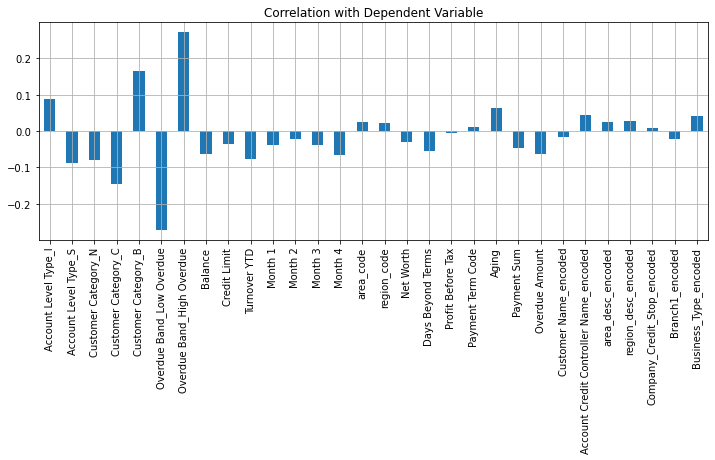

In [54]:
transformed_data.drop('Risk Category_encoded', axis=1).corrwith(transformed_data['Risk Category_encoded']).plot(
    kind='bar', figsize=(12, 4), title='Correlation with Dependent Variable', grid=True)

plt.show()

In [55]:
#selecting 80 percent features for modelling
from sklearn.feature_selection import SelectPercentile, mutual_info_classif


X = transformed_data.drop(columns=['Risk Category_encoded'])  
y = transformed_data['Risk Category_encoded']


mi_scores = mutual_info_classif(X, y)


percentile = 80
selector = SelectPercentile(score_func=mutual_info_classif, percentile=percentile)


X_new = selector.fit_transform(X, y)


selected_features = np.array(X.columns)[selector.get_support()]


for feature, mi_score in zip(X.columns, mi_scores):
    print(f"Feature: {feature}")
    print(f"Mutual Information Score: {mi_score}")
    print("-" * 30)


print(f"Selected Features (Top {percentile}%):")
print(selected_features)

Feature: Account Level Type_I
Mutual Information Score: 0.01703130700544686
------------------------------
Feature: Account Level Type_S
Mutual Information Score: 0.013071148916192765
------------------------------
Feature: Customer Category_N
Mutual Information Score: 0.009033411462443297
------------------------------
Feature: Customer Category_C
Mutual Information Score: 0.016708161286994372
------------------------------
Feature: Customer Category_B
Mutual Information Score: 0.023013032840760284
------------------------------
Feature: Overdue Band_Low Overdue
Mutual Information Score: 0.026087312713666266
------------------------------
Feature: Overdue Band_High Overdue
Mutual Information Score: 0.03170069174383583
------------------------------
Feature: Balance
Mutual Information Score: 0.013920267396893893
------------------------------
Feature: Credit Limit
Mutual Information Score: 0.04828245655654606
------------------------------
Feature: Turnover YTD
Mutual Information Score

In [56]:
#we will move ahead with selected features
X=transformed_data[selected_features]
y=transformed_data['Risk Category_encoded']
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.25,random_state=0)

Classifier: Logistic Regression
Training Accuracy: 0.90
Test Accuracy: 0.90
Cross-Validation Mean Accuracy: 0.90
Confusion Matrix:
[[   1    0    0    3]
 [   1    1    0  174]
 [   0    0   34  124]
 [   3    0   14 2975]]
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.25      0.22         4
           1       1.00      0.01      0.01       176
           2       0.71      0.22      0.33       158
           3       0.91      0.99      0.95      2992

    accuracy                           0.90      3330
   macro avg       0.70      0.37      0.38      3330
weighted avg       0.90      0.90      0.87      3330

Classifier: Decision Tree
Training Accuracy: 1.00
Test Accuracy: 0.87
Cross-Validation Mean Accuracy: 0.87
Confusion Matrix:
[[   1    0    0    3]
 [   0   75    4   97]
 [   0    3   71   84]
 [   3  115  114 2760]]
Classification Report:
              precision    recall  f1-score   support

           0       0.2

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier: K-Nearest Neighbors
Training Accuracy: 0.93
Test Accuracy: 0.92
Cross-Validation Mean Accuracy: 0.91
Confusion Matrix:
[[   1    0    0    3]
 [   1   53    0  122]
 [   1    0   41  116]
 [   1   16   15 2960]]
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.25      0.25         4
           1       0.77      0.30      0.43       176
           2       0.73      0.26      0.38       158
           3       0.92      0.99      0.96      2992

    accuracy                           0.92      3330
   macro avg       0.67      0.45      0.51      3330
weighted avg       0.91      0.92      0.90      3330

Classifier: Naive Bayes
Training Accuracy: 0.80
Test Accuracy: 0.79
Cross-Validation Mean Accuracy: 0.63
Confusion Matrix:
[[   4    0    0    0]
 [   1  102   10   63]
 [   0   21   53   84]
 [  13  411  104 2464]]
Classification Report:
              precision    recall  f1-score   support

           0       0.22 

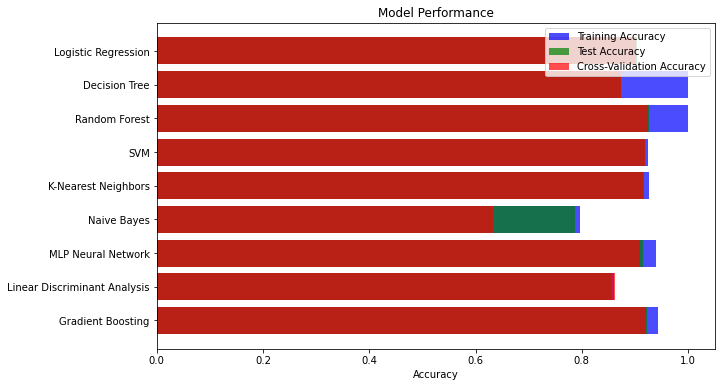

In [57]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score, KFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier






classifiers = [
    ("Logistic Regression", LogisticRegression(max_iter=10000)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("MLP Neural Network", MLPClassifier(max_iter=10000)),
    ("Linear Discriminant Analysis", LinearDiscriminantAnalysis()),
    ("Gradient Boosting", GradientBoostingClassifier())
    
]


train_scores = []
test_scores = []
cross_val_scores = []


for name, classifier in classifiers:
   
    classifier.fit(X_train, y_train)
    
    #training
    train_pred = classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_scores.append(train_accuracy)
    
   #testing
    test_pred = classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_scores.append(test_accuracy)
    
    #  cross-validation
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(classifier, X_train, y_train, cv=kfold, scoring='accuracy')
    cross_val_scores.append(np.mean(cv_scores))
    
   
    print(f"Classifier: {name}")
    print(f"Training Accuracy: {train_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")
    print(f"Cross-Validation Mean Accuracy: {np.mean(cv_scores):.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, test_pred))
    print("Classification Report:")
    print(classification_report(y_test, test_pred))
    print("=" * 50)

# Plotting 
plt.figure(figsize=(10, 6))
plt.barh([name for name, _ in classifiers], train_scores, color='b', alpha=0.7, label='Training Accuracy')
plt.barh([name for name, _ in classifiers], test_scores, color='g', alpha=0.7, label='Test Accuracy')
plt.barh([name for name, _ in classifiers], cross_val_scores, color='r', alpha=0.7, label='Cross-Validation Accuracy')
plt.xlabel('Accuracy')
plt.title('Model Performance')
plt.legend()
plt.gca().invert_yaxis()
plt.show()

In [58]:
classi=GradientBoostingClassifier()

classi.fit(X_train, y_train)
train_pred = classi.predict(X_train)

test_pred_gb = classi.predict(X_test)
gb_results_df = pd.DataFrame({'Test Values': y_test, 'Predicted Values': test_pred_gb})

gb_results_df.reset_index(drop=True)

,Test Values,Predicted Values
0,3,3
1,3,3
2,3,3
3,2,2
4,3,3
...,...,...
3325,3,3
3326,3,3
3327,2,3
3328,3,3
